In [1]:
import pandas as pd

df = pd.read_csv('seismic_data.csv')

#Número de ejemplos y atributos
n_rows, n_cols = df.shape
print(f'Número de ejemplos (filas): {n_rows}')
print(f'Número de atributos (columnas): {n_cols}')
print('Nombres de columnas:', list(df.columns), '\n\n')


df.info()


Número de ejemplos (filas): 4018
Número de atributos (columnas): 5
Nombres de columnas: ['Date(UTC)', 'Latitude', 'Longitude', 'Depth', 'Magnitude'] 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date(UTC)  4018 non-null   object 
 1   Latitude   4018 non-null   float64
 2   Longitude  4018 non-null   float64
 3   Depth      4018 non-null   int64  
 4   Magnitude  4018 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 157.1+ KB


In [2]:
#Conversión de la columna 'Date(UTC)' a tipo datetime
df['Date(UTC)'] = pd.to_datetime(df['Date(UTC)'])

df['Date(UTC)'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4018 entries, 0 to 4017
Series name: Date(UTC)
Non-Null Count  Dtype         
--------------  -----         
4018 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 31.5 KB


In [3]:
print('Visualización de las primeras filas del dataset:\n')
df.head()

Visualización de las primeras filas del dataset:



,Date(UTC),Latitude,Longitude,Depth,Magnitude
0,2025-05-26 03:50:27,-19.63,-69.49,97,5.6
1,2025-05-13 00:47:58,-51.25,-72.28,28,5.1
2,2025-05-05 09:46:48,-29.49,-71.84,48,5.0
3,2025-05-05 02:17:48,-31.89,-70.88,88,5.1
4,2025-05-02 15:23:49,-27.52,-72.48,30,5.8


In [4]:
#Verificación de valores nulos
print(f'Verificación de valores nulos:\n {df.isnull().sum()} \n')


#Identificación de filas duplicadas
print(f'Total de valores duplicados:\n {df.duplicated().sum()}')

Verificación de valores nulos:
 Date(UTC)    0
Latitude     0
Longitude    0
Depth        0
Magnitude    0
dtype: int64 

Total de valores duplicados:
 3


In [5]:
#Identificación de filas duplicadas
df[df.duplicated(keep=False)]

,Date(UTC),Latitude,Longitude,Depth,Magnitude
1822,2019-11-01 23:43:27,-29.25,-71.59,40,4.2
1823,2019-11-01 23:43:27,-29.25,-71.59,40,4.2
2055,2019-04-25 09:33:32,-29.66,-71.30,68,3.8
2056,2019-04-25 09:33:32,-29.66,-71.30,68,3.8
2122,2019-03-13 21:46:10,-30.71,-71.41,42,4.1
2123,2019-03-13 21:46:10,-30.71,-71.41,42,4.1


In [6]:
# Eliminación de filas duplicadas (crear df_clean sin usar inplace)
before_count = len(df)
df_clean = df.drop_duplicates()  # retorna el DataFrame limpio
removed = before_count - len(df_clean)
print(f'Duplicados eliminados: {removed}')
print("Total de filas ahora:", len(df_clean))
print("Verificación duplicados restantes:", df_clean.duplicated().sum())

Duplicados eliminados: 3
Total de filas ahora: 4015
Verificación duplicados restantes: 0


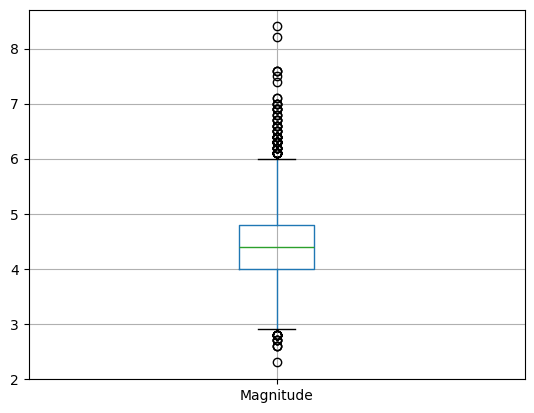

In [7]:
#Verificación de valores atípicos en la columna 
import matplotlib.pyplot as plt
df_clean.boxplot(column='Magnitude')
plt.show()

In [8]:
# Mostrar los sismos de mayor magnitud
print(df_clean.sort_values('Magnitude', ascending=False).head(10))

               Date(UTC)  Latitude  Longitude  Depth  Magnitude
3535 2015-09-16 22:54:28    -31.55     -71.86     11        8.4
3955 2014-04-01 23:46:45    -19.57     -70.91     39        8.2
3928 2014-04-03 02:43:15    -20.52     -70.44     28        7.6
2879 2016-12-25 14:22:23    -43.52     -74.39     30        7.6
3531 2015-09-16 23:18:35    -31.59     -71.79     16        7.6
5    2025-05-02 12:58:32    -56.88     -68.06     10        7.5
100  2024-07-19 01:50:47    -23.12     -68.07    145        7.4
3534 2015-09-16 22:59:15    -31.62     -71.75     27        7.1
2348 2018-08-24 09:04:07    -11.07     -70.79    624        7.1
2517 2018-01-14 09:18:44    -15.77     -74.67     35        7.0


In [9]:
# Sismos con magnitud > 6.0
sismos_mayor_6 = df_clean[df_clean['Magnitude'] >= 6.0].sort_values('Magnitude', ascending=False).copy()
print(f'Total sismos con Magnitude > 6.0: {len(sismos_mayor_6)}')
# Mostrar las primeras 20 filas ordenadas por magnitud
sismos_mayor_6[['Date(UTC)','Latitude','Longitude','Depth','Magnitude']].head(20)

Total sismos con Magnitude > 6.0: 121


,Date(UTC),Latitude,Longitude,Depth,Magnitude
3535,2015-09-16 22:54:28,-31.55,-71.86,11,8.4
3955,2014-04-01 23:46:45,-19.57,-70.91,39,8.2
3531,2015-09-16 23:18:35,-31.59,-71.79,16,7.6
3928,2014-04-03 02:43:15,-20.52,-70.44,28,7.6
2879,2016-12-25 14:22:23,-43.52,-74.39,30,7.6
5,2025-05-02 12:58:32,-56.88,-68.06,10,7.5
100,2024-07-19 01:50:47,-23.12,-68.07,145,7.4
2348,2018-08-24 09:04:07,-11.07,-70.79,624,7.1
3534,2015-09-16 22:59:15,-31.62,-71.75,27,7.1
2143,2019-03-01 08:50:41,-14.70,-70.39,260,7.0


In [12]:
# Guardar dataset limpio tras eliminación de duplicados

df_clean.to_csv('seismic_data_clean.csv', index=False, encoding='utf-8')
print(f'Dataset limpio guardado en: {'seismic_data_clean.csv'}')
print('Shape final:', df_clean.shape)
df_clean.head()

Dataset limpio guardado en: seismic_data_clean.csv
Shape final: (4015, 5)


,Date(UTC),Latitude,Longitude,Depth,Magnitude
0,2025-05-26 03:50:27,-19.63,-69.49,97,5.6
1,2025-05-13 00:47:58,-51.25,-72.28,28,5.1
2,2025-05-05 09:46:48,-29.49,-71.84,48,5.0
3,2025-05-05 02:17:48,-31.89,-70.88,88,5.1
4,2025-05-02 15:23:49,-27.52,-72.48,30,5.8
